In [4]:
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
data={'name':['Rex','Peter','Sam','Rita','Hilda'],'Age':[20,12,50,42,35],'Height':[120,150,142,145,125],'Weight':[0,100,75,55,40],'Bp':[80,100,65,70,40]}
frame=DataFrame(data)
print(frame)
frame.to_csv('patient_data.csv', index=False)
df=pd.read_csv('patient_data.csv')
print(df)
df=df.replace(0,df.mean(numeric_only=True))
frame2=df[['Age','Bp','Height','Weight']]
print(frame2)

scaler = StandardScaler()

scaler.fit(frame2)
scaled = scaler.transform(frame2)
print(scaled.shape)

print("Mean:", scaled.mean(axis=0))
print("Std:", scaled.std(axis=0))
frame3 = df[['Age','Bp','Height','Weight']]
min_max = MinMaxScaler()
min_max.fit(frame3)
scaled2 = min_max.transform(frame3)
print(scaled2)
print("Mean:", scaled2.mean(axis=0))
print("Std:", scaled2.std(axis=0))
sel=VarianceThreshold(threshold=(.5*(1-.9)))
useful_feature1=sel.fit_transform(scaled)
print("Useful feature: ", useful_feature1)
useful_feature2=sel.fit_transform(scaled2)
print("Useful feature: ", useful_feature2)



    name  Age  Height  Weight   Bp
0    Rex   20     120       0   80
1  Peter   12     150     100  100
2    Sam   50     142      75   65
3   Rita   42     145      55   70
4  Hilda   35     125      40   40
    name  Age  Height  Weight   Bp
0    Rex   20     120       0   80
1  Peter   12     150     100  100
2    Sam   50     142      75   65
3   Rita   42     145      55   70
4  Hilda   35     125      40   40
   Age   Bp  Height  Weight
0   20   80     120      54
1   12  100     150     100
2   50   65     142      75
3   42   70     145      55
4   35   40     125      40
(5, 4)
Mean: [-4.99600361e-17 -4.44089210e-17 -4.44089210e-16  8.88178420e-17]
Std: [1. 1. 1. 1.]
[[0.21052632 0.66666667 0.         0.23333333]
 [0.         1.         1.         1.        ]
 [1.         0.41666667 0.73333333 0.58333333]
 [0.78947368 0.5        0.83333333 0.25      ]
 [0.60526316 0.         0.16666667 0.        ]]
Mean: [0.52105263 0.51666667 0.54666667 0.41333333]
Std: [0.36781906 0.3265986

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  
0     15.3  396.9   4.98  
1     17.8  396.9   9.14  
(506,)
      CRIM    ZN 

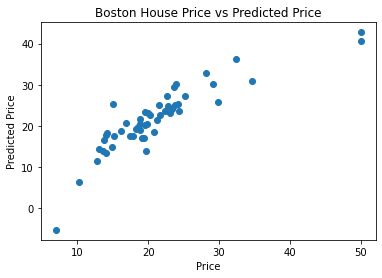

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
boston = datasets.load_boston()
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
df = pd.DataFrame(boston.data)
print(df.head())
df.columns = boston.feature_names
print(df.head(2))
print(boston.target.shape)
df['PRICE'] = boston.target
print(df.head(2))
df.describe()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
test_size=0.10, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print('Intercept: %.3f' % model.intercept_)
y_pred = model.predict(X_test)
print(y_pred[:5])
print(y_test[:5])
plt.scatter(y_test, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Boston House Price vs Predicted Price')
print('R-squared value on training dataset: %0.3f' %model.score(X_train, y_train))
print('R-squared value on training dataset: %0.3f' %model.score(X_test, y_test))
print('Mean Absolute Error: %0.3f' %metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %0.3f' %metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %0.3f' %np.sqrt(metrics.mean_squared_error(y_test, 
y_pred)))
mean = np.mean(y_test)
print('10% of Mean value of target: {:0.3f}'.format(np.mean(y_test)*0.1))




In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Print training and testing data
print("Training Data:")
print(X_train)
print("Testing Data:")
print(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = model.score(X_test_scaled, y_test)
print("Model Accuracy:", accuracy)
print("Learned Model Weights:")
print(model.coef_)


Training Data:
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.

Training Data:
[[ 0.  0.  3. ... 13.  4.  0.]
 [ 0.  0.  9. ...  3.  0.  0.]
 [ 0.  0.  0. ...  6.  0.  0.]
 ...
 [ 0.  0.  9. ... 16.  2.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  1.  0.  0.]]
Testing Data:
[[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0.  7. ... 10.  0.  0.]
 [ 0.  0.  7. ... 16.  4.  0.]
 [ 0.  0. 14. ...  5.  0.  0.]]
SVM Model Accuracy: 0.975
SVM Classification Report:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360

SVM Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 45  1  0  0  0]
 [ 1  0  0  0  0  0 3

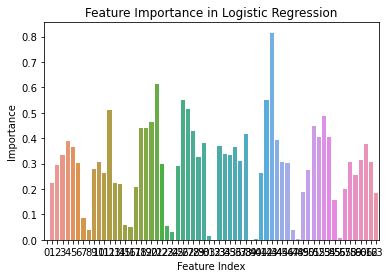

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = load_digits()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data:")
print(X_train)
print("Testing Data:")
print(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear', max_iter=500, probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("Learned Model Weights:")
print(logistic_model.coef_)
print("Comparison of Models:")
print(f"SVM Accuracy: {svm_accuracy}, Logistic Regression Accuracy: {logistic_accuracy}")
feature_importance = np.abs(logistic_model.coef_).mean(axis=0)
sns.barplot(x=np.arange(len(feature_importance)), y=feature_importance)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance in Logistic Regression")
plt.show()
